In [1]:
from sklearn.neighbors import KernelDensity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
#import geopandas as gpd
from mpl_toolkits.basemap import Basemap
#from shapely.geometry import Point, Polygon

#%matplotlib inline

In [2]:
dir_ = "../../data/database/output_ml/M1/NER_extractor/"
file = 'accident_tweets_lat_lon_3_months_bogota.tsv'

dataset = pd.read_csv(dir_+file, delimiter = "\t", quoting = 3)
df = dataset[(dataset['created_at'] >= '2018-10-01') & (dataset['created_at'] < '2018-11-01')]
geodata = df[['lat','lon']]
geodata.head(5)

lat        lon
0  4.664445 -74.053855
1  4.664445 -74.053855
2  4.613574 -74.092709
3  4.613574 -74.092709
4  4.743242 -74.038825

In [63]:
latlon = np.vstack([geodata['lat'],
                    geodata['lon']]).T
latlon

array([[  4.6644446 , -74.053855  ],
       [  4.6644446 , -74.053855  ],
       [  4.61357357, -74.09270913],
       ...,
       [  4.6720161 , -74.1149971 ],
       [  4.6720161 , -74.1149971 ],
       [  4.6720161 , -74.1149971 ]])

In [64]:
kde = KernelDensity(bandwidth=0.0003, kernel='epanechnikov')
kde.fit(X = np.radians(latlon))

KernelDensity(bandwidth=0.0003, kernel='epanechnikov')

<ipython-input-90-3a486c50c2c3>:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map = Basemap(llcrnrlon=-74.253565,llcrnrlat=4.421138,urcrnrlon= -73.936334,urcrnrlat=4.874886,
<ipython-input-90-3a486c50c2c3>:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.readshapefile('maps/locashp/Loca', 'Loca')


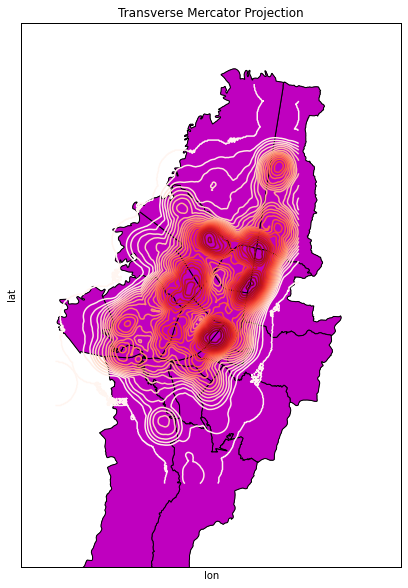

In [90]:
#plt.subplots(figsize=(10,10))
#fig = plt.figure()
#ax = fig.add_subplot(111)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
#fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)


# Grid de valores dentro del rango observado (2 dimensiones)
x = np.linspace(min(geodata.lon), max(geodata.lon), 400)
y = np.linspace(min(geodata.lat), max(geodata.lat), 400)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack((yy.flatten(), xx.flatten()))

# Densidad de probabilidad de cada valor del grid
#log_densidad_pred = modelo_kde_final.score_samples(np.radians(grid))
#densidad_pred = np.exp(log_densidad_pred)

log_densidad_pred = kde.score_samples(np.radians(grid))
densidad_pred = np.exp(log_densidad_pred)


map = Basemap(llcrnrlon=-74.253565,llcrnrlat=4.421138,urcrnrlon= -73.936334,urcrnrlat=4.874886,
             resolution='c', projection='cyl', lat_0 = 4.4863006081, lon_0 = -74.2306435108)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
#map.drawcoastlines()

map.readshapefile('maps/locashp/Loca', 'Loca')
#map.readshapefile('maps/munishp/Muni', 'Muni')
#map.readshapefile('maps/calzadashp/Calzada', 'Calzada')
#map.readshapefile('maps/malla/Malla_Vial_Integral_Bogota_D_C', 'Malla_Vial_Integral_Bogota_D_C')
patches   = []


for info, shape in zip(map.Loca_info, map.Loca):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
    
ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))


ax.scatter(geodata.lon, geodata.lat, alpha=0.5)
zz = densidad_pred.reshape(xx.shape)
levels = np.linspace(0, zz.max(), 25)
ax.contour(
    xx, yy, zz, levels,
    #alpha=0.9,
    cmap=plt.cm.Reds,    
)
ax.set_title('Función de densidad estimada')
ax.set_xlabel('lon')
ax.set_ylabel('lat');


plt.title("Transverse Mercator Projection")
plt.show()

In [ ]:
for info, shape in zip(map.Locas_info, map.Loca):
    if info['nombre'] == 'Selva':
        x, y = zip(*shape) 
        map.plot(x, y, marker=None,color='m')

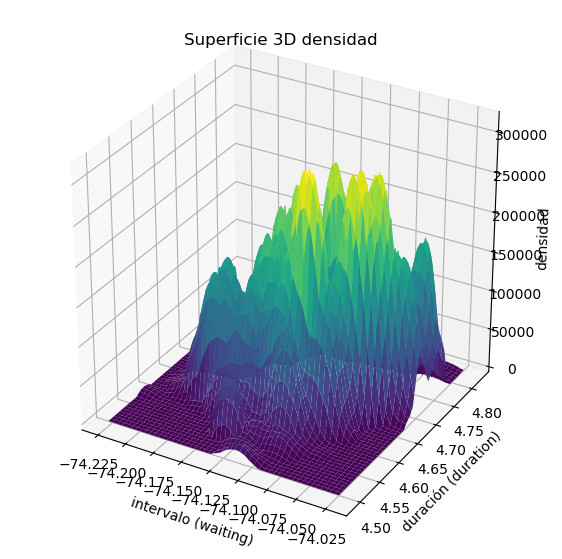

In [97]:
from mpl_toolkits.mplot3d import axes3d
plt.style.use('default')
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
#ax.view_init(60, 35)
ax.plot_surface(xx, yy, densidad_pred.reshape(xx.shape), cmap='viridis')
ax.set_xlabel('intervalo (waiting)')
ax.set_ylabel('duración (duration)')
ax.set_zlabel('densidad')
ax.set_title('Superficie 3D densidad')
plt.show()
plt.style.use('ggplot');

In [42]:
street_map = gpd.read_file('maps/munishp/Muni.shp')
#street_map = gpd.read_file('maps/locashp/Loca.shp')
#street_map = gpd.read_file('maps/calzadashp/Calzada.shp')

NameError: name 'gpd' is not defined

<AxesSubplot:>

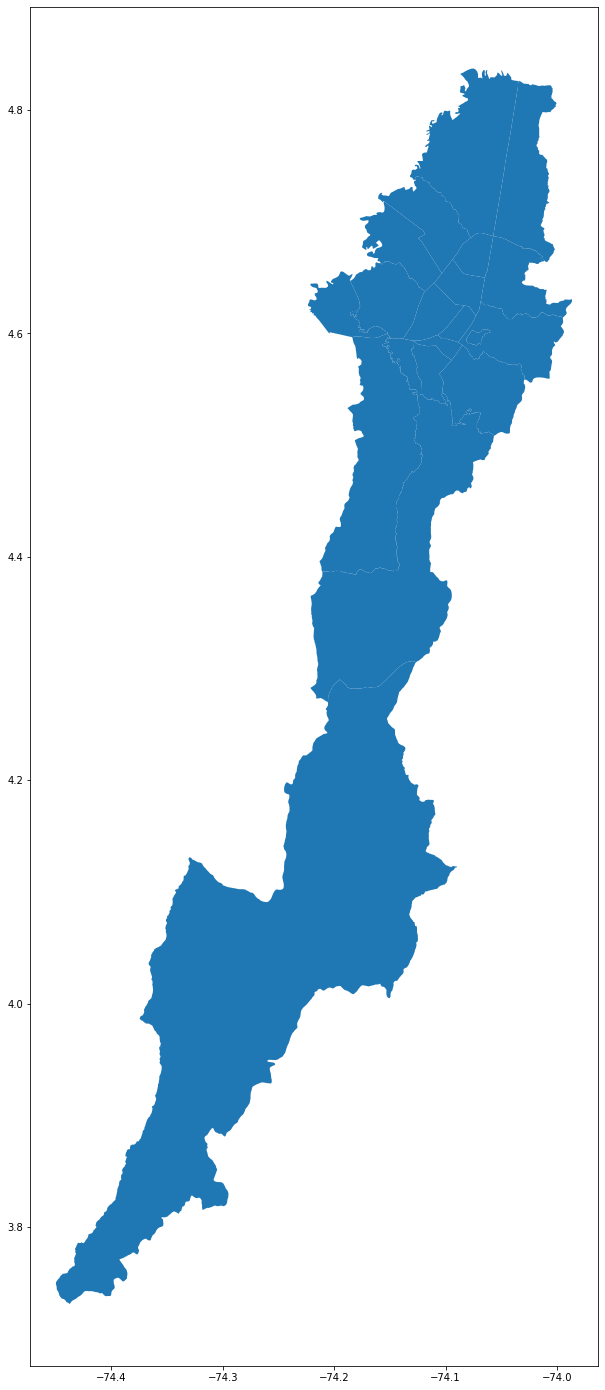

In [12]:
fig, ax = plt.subplots(figsize=(25,25))
street_map.plot(ax = ax)

In [9]:
street_map = gpd.read_file('maps/malla/Malla_Vial_Integral_Bogota_D_C.shp')

<AxesSubplot:>

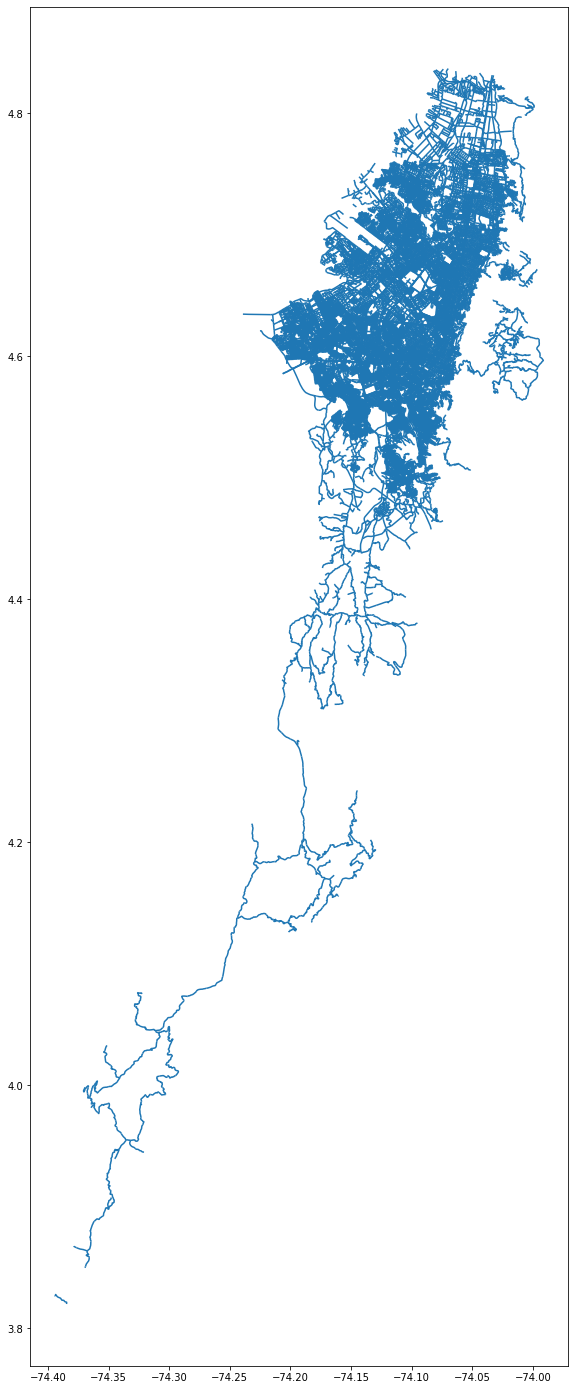

In [10]:
fig, ax = plt.subplots(figsize=(25,25))
street_map.plot(ax = ax)